# Code is from [this blog post](https://victorzhou.com/blog/keras-cnn-tutorial/).

In [1]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
from keras import callbacks as cb

Using TensorFlow backend.


In [2]:
train_images = mnist.train_images() 
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

num_filters = 8
filter_size = 3
pool_size = 2

In [3]:
# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [4]:
# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [5]:
class testCallback(cb.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print('epoch finished!')

In [6]:
# Adapted from https://stackoverflow.com/questions/43178668/record-the-computation-time-for-each-epoch-in-keras-during-model-fit
class TimeHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.time = 0

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.time += time.time() - self.epoch_time_start

In [7]:
import time
time_callback = TimeHistory()
# Train the model.
result = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=6,
  validation_data=(test_images, to_categorical(test_labels)),
  callbacks=[time_callback]
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/6





60000/60000 [==============================] - 8s 137us/step - loss: 0.3683 - acc: 0.8959 - val_loss: 0.2237 - val_acc: 0.9356
Epoch 2/6
60000/60000 [==============================] - 8s 138us/step - loss: 0.1955 - acc: 0.9437 - val_loss: 0.1539 - val_acc: 0.9568
Epoch 3/6
60000/60000 [==============================] - 8s 137us/step - loss: 0.1366 - acc: 0.9603 - val_loss: 0.1262 - val_acc: 0.9625
Epoch 4/6
60000/60000 [==============================] - 8s 136us/step - loss: 0.1065 - acc: 0.9687 - val_loss: 0.0992 - val_acc: 0.9711
Epoch 5/6
60000/60000 [==============================] - 8s 136us/step - loss: 0.0900 - acc: 0.9733 - val_loss: 0.0943 - val_acc: 0.9711
Epoch 6/6
60000/60000 [==============================] - 8s 137us/step - loss: 0.0797 - acc: 0.9764 - val_loss: 0.0823 - val_acc: 0.9744


In [9]:
print(result.history)
time_spent = time_callback.time
print(time_spent)

{'val_loss': [0.2237384033590555, 0.1538520780801773, 0.12617362432330848, 0.09922690825238824, 0.09432859496492893, 0.08231114954538643], 'val_acc': [0.9356, 0.9568, 0.9625, 0.9711, 0.9711, 0.9744], 'loss': [0.36825620981852214, 0.19546316243708134, 0.13655511018087466, 0.1064669977940619, 0.08999748490663866, 0.07965323837126295], 'acc': [0.8958833333333334, 0.9437333333333333, 0.9602833333333334, 0.9686833333333333, 0.9732833333333333, 0.9763833333333334]}
49.1949999332428


In [10]:
import matplotlib
import matplotlib.pyplot as plt

3.1.1


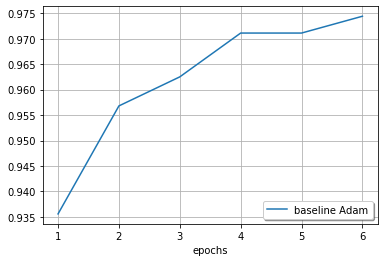

In [16]:
print(matplotlib.__version__)

random_vals = (50 - np.random.rand(30)) / 50

fig, ax = plt.subplots()
ax.plot(range(1,7), result.history['val_acc'], label="baseline Adam")
legend = ax.legend(loc='lower right', shadow=True, fontsize='medium')
ax.set(xlabel='epochs')
ax.grid()

fig.savefig("baseline_adam.png")

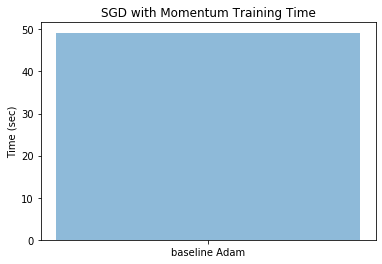

In [19]:
objects = ['baseline Adam']
y_pos = np.arange(len(objects))
performance = [time_spent]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time (sec)')
plt.title('SGD with Momentum Training Time')

plt.show()